# <span style='color:green'> Python visualization 101 </span>

## <span style='color:blue'> 1. Matplotlib </span>

Matplotlib is a base visualization library in Python, originally created by John Hunter (http://matplotlib.org/). It is the foundation for learning many other visualization tools.

By convention, we import the module of matplotlib.pyplot as plt.

The method _plt.show()_ is used to display the plot in a new window. But to view plots in Notebook, we need to add a special line of code as seen in below. 

To save a plot to file, we can use _fig.savefig("filename.format", dpi=100)_. dpi means 'dots per inch' for resolution, and its default value is 100.

As a note, the default values in matplotlib can be find by _from matplotlib import rcParams as default\_dict_, which returns a _dict_ storing the values. For example, we can find that the default file format for saving a figure is 'png'. 

In [1]:
from matplotlib import rcParams as default_dict
default_dict['savefig.format']

'png'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# generate random Gaussian values
from random import seed
from random import gauss
# seed random number generator
seed(1)
# generate some Gaussian values

x = sorted([gauss(0,1) * 10 for _ in range(10)])
y = [n**2 for n in x]

In [4]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

xlab = 'values'
ylab = 'squared'
mytitle = 'This is 101'

### 1.1. Single plot

#### 1.1.1. Use _plt.plot_
This is the basic way to plot in Python. 

We can see that there is a popup of message showing the text with its location. This can be suppressed by adding a ';' in the last line or adding a line of _plt.show()_ in the end.

Text(0.5, 1.0, 'This is 101')

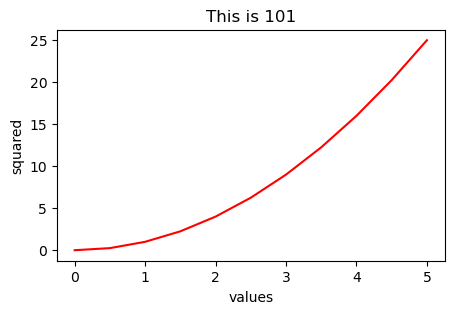

In [5]:
plt.figure(figsize=(5,3))
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(mytitle)

#### 1.1.2. Use _plt.figure()_

We first instantiate an object of _figure_ and add one or more _axes_ to it. 

In this context, an _axes_ is actually a plot (maybe because we define a plot by relative positions and sizes as \[left, bottom, width, height\], which are for x/y-axis). A _figure_ object can contain multiple _axes_ objects. 

Obviously, this method applies to creating multiple plots as well. The axes can be generated sequentially or by defining names anywhere (see next part).

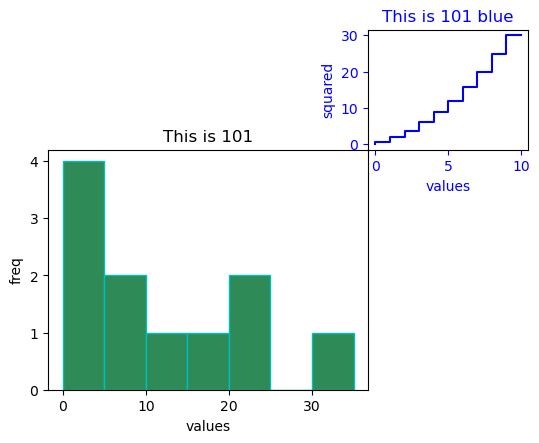

In [6]:
fig = plt.figure()

axes = fig.add_axes([0., 0., 0.5, 0.5]) # left, bottom, width, height (range 0 to 1)

axes.hist(x+y, bins=range(0,40,5), color='seagreen', edgecolor = "c")

axes.set_xlabel(xlab)
axes.set_ylabel('freq')
axes.set_title(mytitle)

axes = fig.add_axes([0.5, 0.5, 0.25, 0.25]) # left, bottom, width, height (range 0 to 1)

axes.step(x+y, 'b')
axes.set_xlabel(xlab)
axes.set_ylabel(ylab)
axes.set_title(f'{mytitle} blue', color='b')

axes.xaxis.label.set_color('b')
axes.yaxis.label.set_color('b')
axes.tick_params(axis='both', colors='b')

plt.show()

### 1.2. Multiple plots

#### 1.2.1. Use _subplot()_
We can first define a matrix of deployment by (nrows, ncols, plot_index-1-based). Then add the plots one by one.

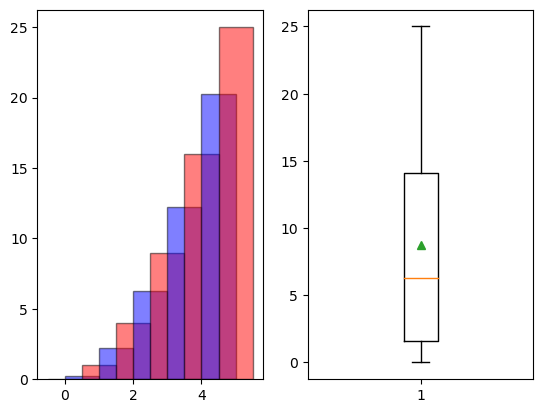

In [7]:
plt.subplot(1,2,1)
plt.bar(x, y, color=['r', 'b']*5 + ['r'],  edgecolor='k', align="center", width=1, alpha=0.5)
plt.subplot(1,2,2)
plt.boxplot(y, vert=True, patch_artist=False, showmeans=True, meanline=False)
plt.show()

#### 1.2.2. Use _plt.figure()_ and _add_axes()_
As mentioned in 1.1.2, this is flexible in postioning plots. Define a _figure_ first and then add _axes_ one by one.

We can then declare the named _axes_ for convenience.

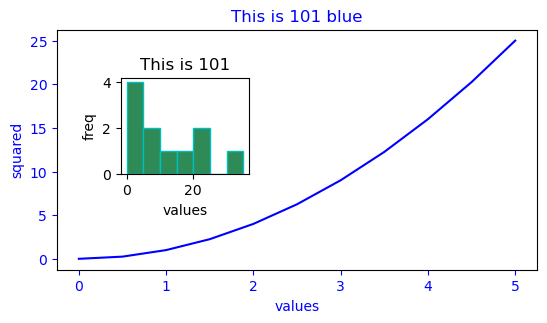

In [8]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.75, 0.5]) 
axes2 = fig.add_axes([0.2, 0.3, 0.2, 0.2])

axes1.plot(x, y, 'b')
axes1.set_xlabel(xlab)
axes1.set_ylabel(ylab)
axes1.set_title(f'{mytitle} blue', color='b')

axes2.hist(x+y, bins=range(0,40,5), color='seagreen', edgecolor = "c")

axes2.set_xlabel(xlab)
axes2.set_ylabel('freq')
axes2.set_title(mytitle)

axes1.xaxis.label.set_color('b')
axes1.yaxis.label.set_color('b')
axes1.tick_params(axis='both', colors='b')

#### 1.2.3. Use _plt.subplots()_

The method plt.subplots() instantiates a list of two objects, _figure_ and _axes_, at once.  The layout is defined by parameters _nrows_ and _ncols_. By default, it will have one single _axes_ or plot.

This is essentially the same as the previous one, but the layout is automatically set up.

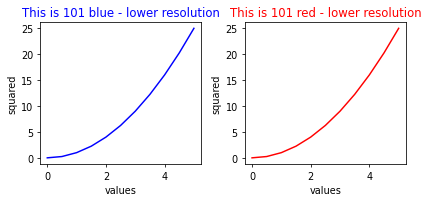

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3), dpi=70) 
for i, ax in enumerate(axes):
    if i == 0:
        mycolor = 'blue'
    else:
        mycolor = 'red'
    ax.plot(x, y, mycolor)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(f'{mytitle} {mycolor} - lower resolution', color=mycolor)
  
fig.tight_layout() # avoid overlap; plt.tight_layout() also works.

We can pre-define the axes names. This allows us to customize plots in a loop as shown above or individually.

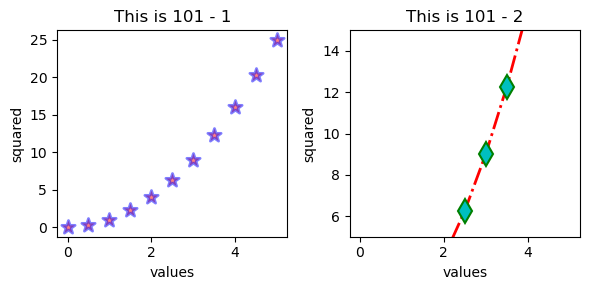

In [10]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(6,3), dpi=100)

ax1.scatter(x, y, color='r', marker='*', s=100, edgecolors='b', alpha=0.5, linewidth=2)
ax1.set_xlabel(xlab)
ax1.set_ylabel(ylab)
ax1.set_title(f'{mytitle} - 1')

ax2.plot(x, y, color='r', linewidth=2, linestyle='-.', marker='d', markersize=12, 
         markerfacecolor='c', markeredgewidth=1.5, markeredgecolor="g" )
ax2.set_xlabel(xlab)
ax2.set_ylabel(ylab)
ax2.set_ylim([5,15])
ax2.set_title(f'{mytitle} - 2')

fig.tight_layout()

## <span style='color:blue'> 2. Seaborn </span>

"Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics." (<a href='https://seaborn.pydata.org/'> seaborn documentation </a>)

In [11]:
import seaborn as sns
import seaborn.objects as so
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Seaborn is conventionally imported as 'sns'. To learn seaborn by practicing, there are two useful and basic functions we should use: sns.load_dataset() and sns.set_theme(). More information can be displayed by using help() or ? in jupyter notebook. sns.set_theme() will set the plot style with rcParams (see 1). Here I use the default style 'darkgrid' for plotting.

We can also use sns.set_style() and sns.set_palette() to set style and palette within theme, respectively. The font family can be set outside the set_theme by using matplotlib.rcParams\["font.family"\] or plt.rcParams\["font.family"\]. Using sns.set_theme() without parameters will reset everything to the default. 

To display all available font families, use matplotlib.font_manager.get_font_names().

I am going to load and use sample datasets: _titanic_ and _iris_.

In [12]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
matplotlib.rcParams["font.family"] = "American Typewriter"

titanic = sns.load_dataset('titanic')
display(titanic.head())
iris = sns.load_dataset('iris')
display (iris.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.1. A new development of Seaborn: seaborn.objects

Seaborn is a visualization library in Python. It builds upon the popular matplotlib library and well integrates with pandas for data exploration and analytic presentation.

The release v0.12.0 (September 2022) "debuts the seaborn.objects interface, an __entirely new approach__ to making plots with seaborn. It is the product of several years of design and 16 months of implementation work. The interface aims to provide a more declarative, composable, and extensible API for making statistical graphics. It is inspired by Wilkinson’s grammar of graphics, offering a Pythonic API that is informed by the design of libraries such as ggplot2 and vega-lite along with lessons from the past 10 years of seaborn’s development."

"In contrast to the existing seaborn functions, the new interface aims to support end-to-end plot specification and customization without dropping down to matplotlib (although it will remain possible to do so if necessary)."

(https://seaborn.pydata.org/whatsnew/v0.12.0.html#introduction-of-the-objects-interface)

This new move is exciting to those ggplot2 users with either R or Python (plotnine). The current Seaborn is v0.12.2 (December 2022). Since _seaborn.objects_ is still under active development, some functions are pretty new. 

Here is a simple diagram showing the seaborn’s function interface (we can either set or map parameters at the right places):
  
<a href='https://seaborn.pydata.org/tutorial/objects_interface.html'> <img src='https://seaborn.pydata.org/_images/objects_interface_48_0.svg' /></a>

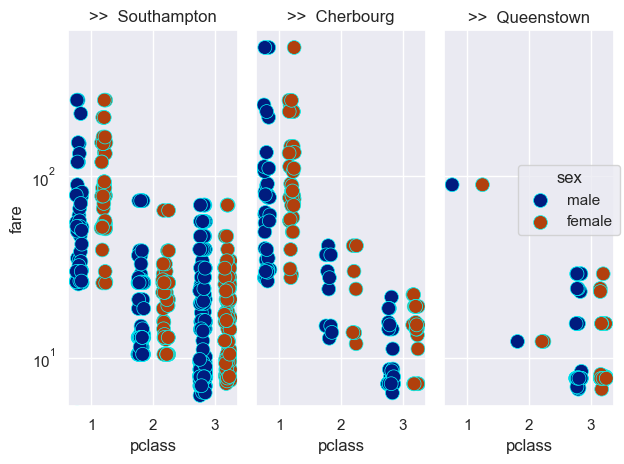

In [13]:
# use () for multi-line code block
p = (
    so.Plot(titanic, x="pclass", y="fare", color="sex")
    .add(so.Dot(pointsize=10, edgecolor='cyan'), so.Dodge(), so.Jitter(.25))
    .scale(color='dark', y='log10')
)

p = p.facet("embark_town").label(col=">> ")

p.show()

### 2.1. Distribution

Mimic the functions _hisplot/kdeplot_ showing the distribution of a univariate set of observations. 

#### Use regular sns functions

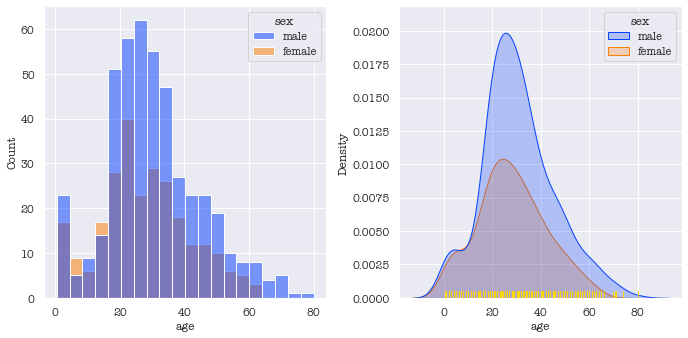

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=70) 

sns.histplot(titanic, x='age', hue='sex', fill=True, palette=sns.color_palette('bright')[:2], ax=axes[0])
sns.kdeplot(titanic, x='age', hue='sex', fill=True, palette=sns.color_palette('bright')[:2], ax=axes[1])
sns.rugplot(titanic, x='age', color='gold', ax=axes[1])
fig.tight_layout()

#### Use seaborn.objects

In _seaborn.objects_, some possible parameters controling the display (e.g., arranging multiple plots) are to be figured out or they are not available yet. Due to the short time, not many examples are available as references at this time.

In [15]:
p1= (
    so.Plot(titanic, x="age", color="sex")
    .add(so.Bars(), so.Hist())
    
)


p2 = (
    so.Plot(titanic, x="age", color="sex",)
    .add(so.Area(), so.KDE(bw_adjust=0.25, cumulative=False))
    
)


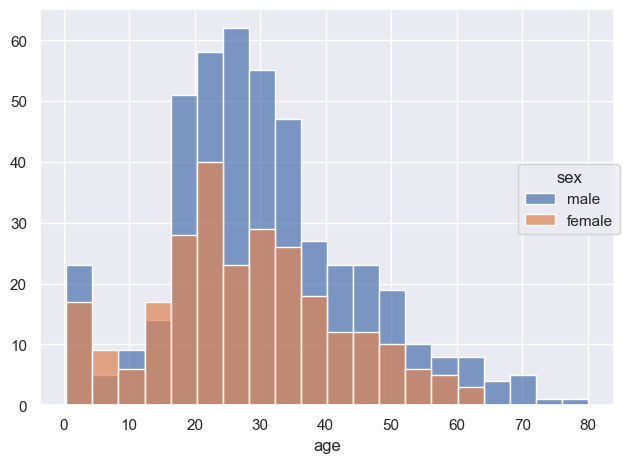

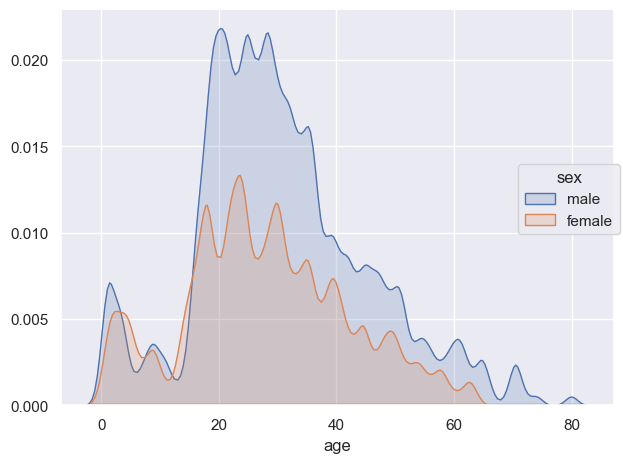

In [16]:
p1.show()
p2.show()